# Leetcode

355. Design Twitter

https://leetcode.com/problems/design-twitter/

**Description**

    Design a simplified version of Twitter where users can post tweets, follow/unfollow another user, and is able to see the 10 most recent tweets in the user's news feed.

    Implement the Twitter class:

    Twitter() Initializes your twitter object.
    void postTweet(int userId, int tweetId) Composes a new tweet with ID tweetId by the user userId. Each call to this function will be made with a unique tweetId.
    List<Integer> getNewsFeed(int userId) Retrieves the 10 most recent tweet IDs in the user's news feed. Each item in the news feed must be posted by users who the user followed or by the user themself. Tweets must be ordered from most recent to least recent.
    void follow(int followerId, int followeeId) The user with ID followerId started following the user with ID followeeId.
    void unfollow(int followerId, int followeeId) The user with ID followerId started unfollowing the user with ID followeeId.

**Examples**

    Example 1:

    Input
    ["Twitter", "postTweet", "getNewsFeed", "follow", "postTweet", "getNewsFeed", "unfollow", "getNewsFeed"]
    [[], [1, 5], [1], [1, 2], [2, 6], [1], [1, 2], [1]]
    Output
    [null, null, [5], null, null, [6, 5], null, [5]]

    Explanation
    Twitter twitter = new Twitter();
    twitter.postTweet(1, 5); // User 1 posts a new tweet (id = 5).
    twitter.getNewsFeed(1);  // User 1's news feed should return a list with 1 tweet id -> [5]. return [5]
    twitter.follow(1, 2);    // User 1 follows user 2.
    twitter.postTweet(2, 6); // User 2 posts a new tweet (id = 6).
    twitter.getNewsFeed(1);  // User 1's news feed should return a list with 2 tweet ids -> [6, 5]. Tweet id 6 should precede tweet id 5 because it is posted after tweet id 5.
    twitter.unfollow(1, 2);  // User 1 unfollows user 2.
    twitter.getNewsFeed(1);  // User 1's news feed should return a list with 1 tweet id -> [5], since user 1 is no longer following user 2.
 

**Constraints**

    1 <= userId, followerId, followeeId <= 500
    0 <= tweetId <= 10^4
    All the tweets have unique IDs.
    At most 3 * 10^4 calls will be made to postTweet, getNewsFeed, follow, and unfollow.

In [10]:
from collections import defaultdict
import heapq

class Twitter:

    def __init__(self):
        self.count = 0
        self.followMap = defaultdict(set)
        self.tweetMap = defaultdict(list)

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.tweetMap[userId].append([self.count, tweetId])
        self.count-=1

    def getNewsFeed(self, userId: int) -> list[int]:
        ans = []
        minHeap = []
        self.followMap[userId].add(userId)
        for followeeId in self.followMap[userId]:
            if followeeId in self.tweetMap:
                index= len(self.tweetMap[followeeId])-1
                count, tweetId = self.tweetMap[followeeId][index]
                heapq.heappush(minHeap, [count, tweetId, followeeId, index-1])
                
        while minHeap and len(ans)<10:
            count, tweetId, followeeId, index = heapq.heappop(minHeap)
            ans.append(tweetId)
            if index>=0:
                count, tweetId = self.tweetMap[followeeId]
                heapq.heappush(minHeap, [count, tweetId, followeeId, index-1])        
        return ans

    def follow(self, followerId: int, followeeId: int) -> None:
        self.followMap[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.followMap[followerId]:
            self.followMap[followerId].remove(followeeId)
        


In [11]:
twitter =Twitter()
print(twitter.postTweet(1, 5))
print(twitter.getNewsFeed(1))
print(twitter.follow(1, 2))
print(twitter.postTweet(2, 6))
print(twitter.getNewsFeed(1))
print(twitter.unfollow(1, 2))
print(twitter.getNewsFeed(1))

None
[5]
None
None
[6, 5]
None
[5]


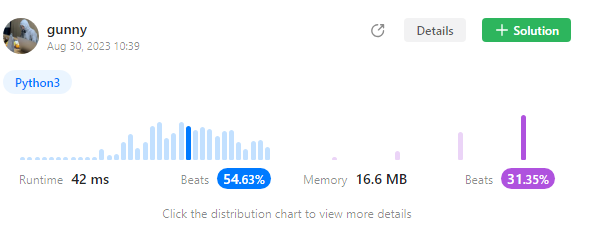